In [19]:
import os
import modin.pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from pathlib import Path
import warnings
warnings.filterwarnings("ignore", message=".*defaulting to pandas implementation.*")
pd.set_option('display.float_format', '{:.6f}'.format)
start_time = time.time()

# Import Model

In [20]:
jupyter_dir = os.path.abspath(str(Path()))
jupyter_dir

'E:\\git\\machine-learning-option-pricing'

In [21]:
models_path = os.path.join(jupyter_dir,'trained_models','trained_models')
models = os.listdir(models_path)
for i, path in enumerate(models):
    print(f"{i}   {path}")

0   2024_10_09 23-01-12 Deep Neural Network otm
1   2024_10_09 23-11-23 Deep Neural Network


In [4]:
model = models[0]
model

'2024_10_09 23-01-12 Deep Neural Network otm'

In [5]:
model_path = os.path.join(models_path,model)

In [6]:
model_files = os.listdir(model_path)
model_files

['2024_10_09 23-01-12 Deep Neural Network otm insample.csv',
 '2024_10_09 23-01-12 Deep Neural Network otm outsample.csv',
 '2024_10_09 23-01-12 Deep Neural Network otm.pkl',
 '2024_10_09 23-01-12 Deep Neural Network otm.txt']

In [7]:
spec_path = os.path.join(model_path,[file for file in model_files if file.endswith('.txt')][0])

In [8]:
model_files

['2024_10_09 23-01-12 Deep Neural Network otm insample.csv',
 '2024_10_09 23-01-12 Deep Neural Network otm outsample.csv',
 '2024_10_09 23-01-12 Deep Neural Network otm.pkl',
 '2024_10_09 23-01-12 Deep Neural Network otm.txt']

In [9]:
pd.reset_option("display.max_rows")
pd.reset_option("display.max_columns")
outsample_path = os.path.join(model_path,[file for file in model_files if file.find('outsample') != -1][0])
outsample = pd.read_csv(outsample_path).iloc[:,1:]
outsample

2024-10-10 11:01:34,919	INFO worker.py:1786 -- Started a local Ray instance.


,spot_price,strike_price,barrier,days_to_maturity,barrier_price,updown,outin,w,barrier_type_name,rebate,...,rho,eta,v0,calculation_date,expiration_date,observed_price,moneyness,outofsample_target,outofsample_prediction,outofsample_error
0,1245.640000,1121.076000,622.820000,60,8.190283,Down,Out,put,DownOut,0.000000,...,-1.000000,0.158599,0.052568,2008-07-16,2008-09-14,8.309160,-0.946480,8.309160,11.206677,2.897517
1,1245.640000,1121.076000,622.820000,90,14.195102,Down,Out,put,DownOut,0.000000,...,-1.000000,0.158599,0.052568,2008-07-16,2008-10-14,13.822757,-0.919720,13.822757,15.700405,1.877648
2,1245.640000,1121.076000,622.820000,180,29.283856,Down,Out,put,DownOut,0.000000,...,-1.000000,0.158599,0.052568,2008-07-16,2009-01-12,29.240565,-0.839440,29.240565,27.892928,-1.347637
3,1245.640000,1121.076000,622.820000,180,0.572265,Down,In,put,DownIn,0.000000,...,-1.000000,0.158599,0.052568,2008-07-16,2009-01-12,0.700422,-0.839440,0.700422,1.272468,0.572046
4,1245.640000,1121.076000,622.820000,360,44.405170,Down,Out,put,DownOut,0.000000,...,-1.000000,0.158599,0.052568,2008-07-16,2009-07-11,44.650877,-0.678880,44.650877,39.640275,-5.010602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495523,895.240000,984.764000,1342.860000,360,5.643575,Up,In,put,UpIn,0.000000,...,-1.000000,0.262020,0.270330,2008-11-28,2009-11-23,5.544777,-0.634430,5.544777,11.039417,5.494640
495524,895.240000,984.764000,1342.860000,540,201.948472,Up,Out,put,UpOut,0.000000,...,-1.000000,0.262020,0.270330,2008-11-28,2010-05-22,201.864643,-0.451645,201.864643,189.007118,-12.857525
495525,895.240000,984.764000,1342.860000,540,12.874610,Up,In,put,UpIn,0.000000,...,-1.000000,0.262020,0.270330,2008-11-28,2010-05-22,12.666831,-0.451645,12.666831,25.250266,12.583435
495526,895.240000,984.764000,1342.860000,720,209.208646,Up,Out,put,UpOut,0.000000,...,-1.000000,0.262020,0.270330,2008-11-28,2010-11-18,209.110612,-0.268860,209.110612,204.764752,-4.345860


# Test Model

In [10]:
maturities = outsample['days_to_maturity'].unique().tolist()
barrier_type_names = outsample['barrier_type_name'].unique().tolist()
ws = outsample['w'].unique().tolist()
print(f"\nmaturities:\n     maturities = {maturities}")
print(f"\ntypes:\n     barrier_type_names = {barrier_type_names}\n     ws = {ws}\n")


maturities:
     maturities = [60, 90, 180, 360, 540, 720]

types:
     barrier_type_names = ['DownOut', 'DownIn', 'UpOut', 'UpIn']
     ws = ['put']



In [11]:
by_wbt = outsample.copy().set_index(['w','barrier_type_name','days_to_maturity']).sort_index()

In [12]:
RMSE = pd.DataFrame(
    np.zeros((len(maturities),len(barrier_type_names)),dtype=float),
    columns = barrier_type_names,
    index = maturities
)

for t in maturities:
    for b in barrier_type_names:
        RMSE.loc[t,b] = np.sqrt(np.average((by_wbt.loc[(slice(None), b, t),'outofsample_error'])**2))
print(f"\nRMSE:\n{RMSE}")


RMSE:
      DownOut    DownIn     UpOut      UpIn
60  18.830373 10.835120 21.248105 11.887697
90  17.914689 14.496323 22.685060 10.956622
180 15.229064 20.639717 21.630809 10.330600
360 12.549174 22.678720 14.591663 11.447154
540 11.852249 21.666444 10.839893 12.502602
720 11.204377 20.521894  9.620773 11.796006


In [13]:
MAE = pd.DataFrame(
    np.zeros((len(maturities),len(barrier_type_names)),dtype=float),
    index = maturities,
    columns = barrier_type_names
)
for t in maturities:
    for b in barrier_type_names:
        MAE.loc[t,b] = np.average(np.abs(by_wbt.loc[(slice(None), b, t),'outofsample_error']))
print(f"\nMAE:\n{MAE}")


MAE:
      DownOut    DownIn     UpOut     UpIn
60  10.990855  5.723831 11.613265 6.017784
90   9.624860  7.877792 12.766717 5.433370
180  8.800177 11.131006 11.074176 4.925002
360  7.488050 12.525963  8.177811 5.788525
540  6.768247 12.265612  6.318234 6.296213
720  6.350893 12.001277  5.881890 6.201991


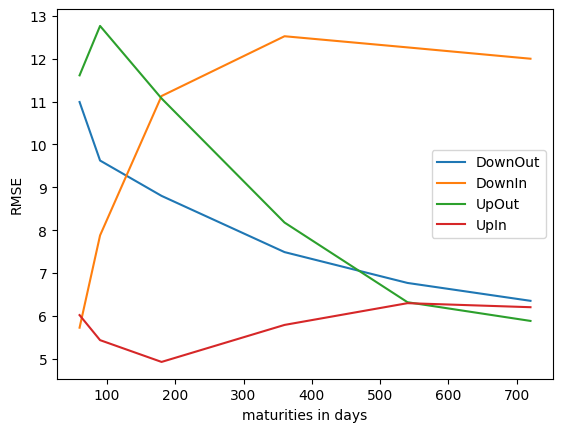

In [14]:
plt.figure()
for b in barrier_type_names:
    plt.plot(MAE.loc[:, b], label=b)
plt.xlabel('maturities in days')
plt.ylabel('RMSE')
plt.legend()
plt.show()
plt.close()

In [15]:
errors_bypayoff = {}
for w in ws:
    errors = {}
    print(
        f"\n         {'#'*(len(w)+5)}"
        f"\n         # {w}s #"
        f"\n         {'#'*(len(w)+5)}"
    )
    RMSE = pd.DataFrame(
        np.zeros((len(maturities),len(barrier_type_names)),dtype=float),
        columns = barrier_type_names
        )
    RMSE[w] = maturities
    RMSE = RMSE.set_index(w,drop=True)
    for t in maturities:
        for b in barrier_type_names:
            RMSE.loc[t,b] = np.sqrt(np.average((by_wbt.loc[(w, b, t),'outofsample_error'])**2))
    print(f"RMSE:\n{RMSE}")
    errors['RMSE'] = RMSE
    


    MAE = pd.DataFrame(
        np.zeros((len(maturities),len(barrier_type_names)),dtype=float),
        columns = barrier_type_names
    )
    MAE[w] = maturities
    MAE = MAE.set_index(w,drop=True)
    for t in maturities:
        for b in barrier_type_names:
            MAE.loc[t,b] = np.average(np.abs(by_wbt.loc[(w, b, t),'outofsample_error']))
    print(f"MAE:\n{MAE}")
    errors['MAE'] = MAE

    errors_bypayoff[w] = errors
    print("\n\n")


         ########
         # puts #
         ########
RMSE:
      DownOut    DownIn     UpOut      UpIn
put                                        
60  18.830373 10.835120 21.248105 11.887697
90  17.914689 14.496323 22.685060 10.956622
180 15.229064 20.639717 21.630809 10.330600
360 12.549174 22.678720 14.591663 11.447154
540 11.852249 21.666444 10.839893 12.502602
720 11.204377 20.521894  9.620773 11.796006
MAE:
      DownOut    DownIn     UpOut     UpIn
put                                       
60  10.990855  5.723831 11.613265 6.017784
90   9.624860  7.877792 12.766717 5.433370
180  8.800177 11.131006 11.074176 4.925002
360  7.488050 12.525963  8.177811 5.788525
540  6.768247 12.265612  6.318234 6.296213
720  6.350893 12.001277  5.881890 6.201991





In [16]:
for w, errors in errors_bypayoff.items():
    for b in barrier_type_names: 
        print(errors['MAE'])

      DownOut    DownIn     UpOut     UpIn
put                                       
60  10.990855  5.723831 11.613265 6.017784
90   9.624860  7.877792 12.766717 5.433370
180  8.800177 11.131006 11.074176 4.925002
360  7.488050 12.525963  8.177811 5.788525
540  6.768247 12.265612  6.318234 6.296213
720  6.350893 12.001277  5.881890 6.201991
      DownOut    DownIn     UpOut     UpIn
put                                       
60  10.990855  5.723831 11.613265 6.017784
90   9.624860  7.877792 12.766717 5.433370
180  8.800177 11.131006 11.074176 4.925002
360  7.488050 12.525963  8.177811 5.788525
540  6.768247 12.265612  6.318234 6.296213
720  6.350893 12.001277  5.881890 6.201991
      DownOut    DownIn     UpOut     UpIn
put                                       
60  10.990855  5.723831 11.613265 6.017784
90   9.624860  7.877792 12.766717 5.433370
180  8.800177 11.131006 11.074176 4.925002
360  7.488050 12.525963  8.177811 5.788525
540  6.768247 12.265612  6.318234 6.296213
720  6.3508

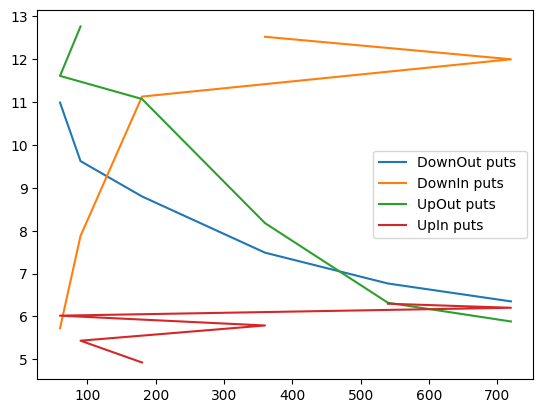

In [17]:
plt.figure()
for w, errors in errors_bypayoff.items():
    for b in barrier_type_names: 
        MAE = errors['MAE'][b]
        plt.plot(
            MAE.sort_values(), label=f"{b} {w}s ",
        )
plt.legend(loc='best')
plt.show()
plt.close()

In [18]:
end_time = time.time()
runtime = end_time - start_time
print(f"cpu: {runtime}")

cpu: 19.311000108718872
